In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path if necessary)
df = pd.read_csv("heart_disease_uci.csv",sep=',')

# Display the first few rows
df.head(200)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,67,Male,Cleveland,asymptomatic,100.0,299.0,False,lv hypertrophy,125.0,True,0.9,flat,2.0,normal,3
196,197,69,Male,Cleveland,typical angina,160.0,234.0,True,lv hypertrophy,131.0,False,0.1,flat,1.0,normal,0
197,198,45,Female,Cleveland,asymptomatic,138.0,236.0,False,lv hypertrophy,152.0,True,0.2,flat,0.0,normal,0
198,199,50,Female,Cleveland,atypical angina,120.0,244.0,False,normal,162.0,False,1.1,upsloping,0.0,normal,0


In [2]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
print(df.describe())


               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [4]:
df = df.drop(columns=['id'])

In [6]:
print(df.nunique())

#The df.nunique() command in pandas allows you to calculate the number of unique values ​​in each column of a DataFrame.

age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64


In [7]:
# Number of null values
print(df.isnull().sum())

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [8]:
from sklearn.impute import SimpleImputer


# Imputation of numeric columns by the median

num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

print(df.isnull().sum())

age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64


In [9]:
# Imputation of categorical columns by mode

cat_cols = ['fbs', 'restecg', 'exang','thal','slope','ca']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
print(df.isnull().sum())

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder



#  LabelEncoder Initialization
le = LabelEncoder()

# Encoding multiple columns

df['sex'] = le.fit_transform(df['sex'])
df['dataset'] = le.fit_transform(df['dataset'])
df['cp'] = le.fit_transform(df['cp'])
df['restecg'] = le.fit_transform(df['restecg'])
df['fbs'] = le.fit_transform(df['fbs'])
df['exang'] = le.fit_transform(df['exang'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])

df.head()


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


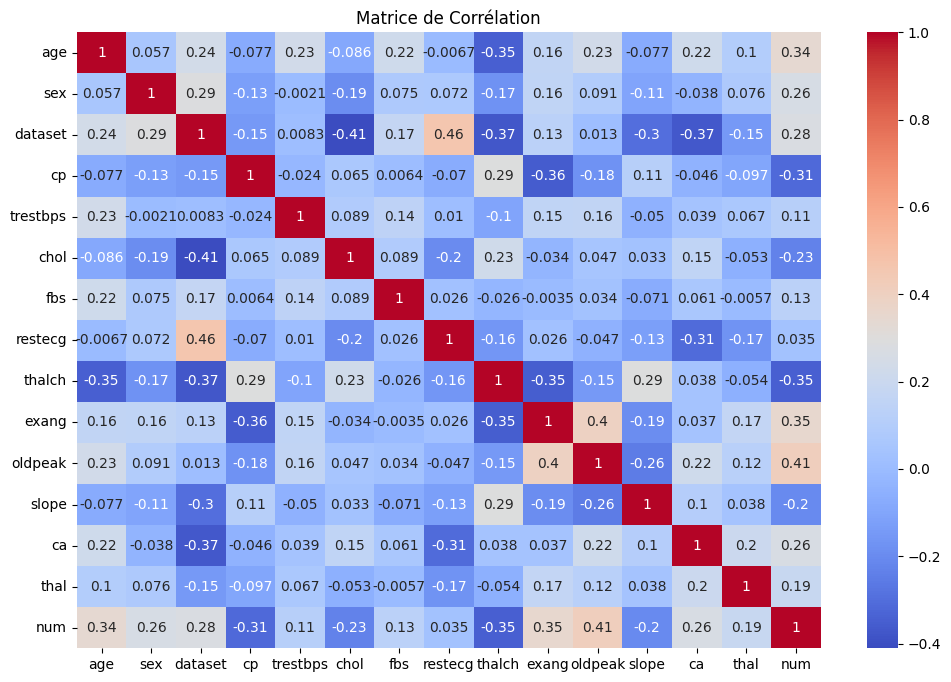

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

From this correlation matrix, we can see that the variables most correlated with heart disease are age, oldpeak, exang, cp and thalch.

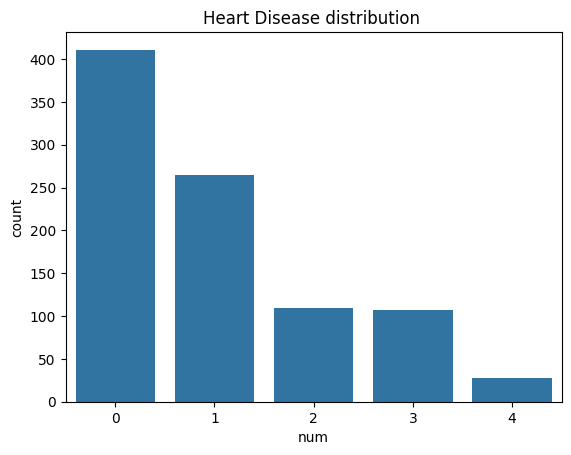

In [12]:
#4.Target variable distribution (presence of heart disease)
sns.countplot(x='num', data=df)
plt.title('Heart Disease distribution ')
plt.show()

The target variable 'num' is broken down into several categories:

0: No heart disease .
1-4: Presence of heart disease, with varying severity.

There is a disparity in the distribution between those affected by heart disease and those who do not or have moderate heart problems.

Most people have mild or no heart disease. The most severe cases of heart disease(level 4) are relatively insignificant.

The purpose of this analysis is predict whether or not a patient has heart disease based on various medical attributes.

Now the distribution of the variable num indicates that there are several categories of illness ranging from the absence of heart disease to the most severe cases of illness, we will therefore apply a transformation of the variable num into a binary variable.

In [13]:
# Convert to binary (0 = No heart disease, 1-2-3-4-->1=Heart disease)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Check the new distribution
print(df['num'].value_counts())

num
1    509
0    411
Name: count, dtype: int64


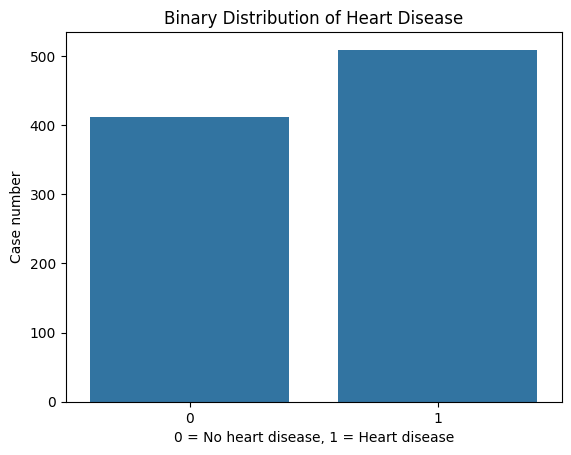

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='num', data=df)
plt.title('Binary Distribution of Heart Disease')
plt.xlabel('0 = No heart disease, 1 = Heart disease')
plt.ylabel('Case number')
plt.show()

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Filter columns with more than 10 unique values

columns_to_scale = df.columns[df.nunique() > 10]

#  StandardScaler Initialization
scaler = StandardScaler()

# Apply the StandardScaler only to non-categorical columns, i.e. with more than 10 unique values
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.007386,1,0,3,0.705176,0.303643,1,0,0.489727,0,1.368109,0,0.0,0,0
1,1.432034,1,0,0,1.518569,0.789967,0,0,-1.181478,1,0.611589,1,3.0,1,1
2,1.432034,1,0,0,-0.650479,0.266939,0,0,-0.345875,1,1.651804,1,2.0,2,1
3,-1.752828,1,0,2,-0.108217,0.459634,0,1,1.961979,0,2.502889,0,0.0,1,0
4,-1.328180,0,0,1,-0.108217,0.037541,0,0,1.365120,0,0.517024,2,0.0,1,0


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
X = df.drop(columns=["num"])
y = df["num"]
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6.Results prediction
y_pred = model.predict(X_test)

# 7. Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7989130434782609
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.77        75
           1       0.88      0.77      0.82       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184

Confusion Matrix:
 [[63 12]
 [25 84]]


Accuracy: 0.799 (≈ 80%)
This means that the model correctly predicts 80% of cases.
This is a good overall performance.

Class 0 (No disease)

Precision (0.72): When the model predicts class 0, it is correct 72% of the time.
Recall (0.84): Of all true class 0 cases, the model detects 84%.
F1-Score (0.77): Good balance between precision and recall.

The model detects the majority of class 0 cases well, but it makes classification errors (false positives).

Class 1 ( Disease Heart)

Precision (0.88): When predicting "disease," it is correct 88% of the time.
Recall (0.77): But it only detects 77% of true disease cases.
F1-Score (0.82): Good score, but still misses some disease cases.
Interpretation: The model is very accurate when predicting "disease," but misses some cases, which is critical in a medical context.

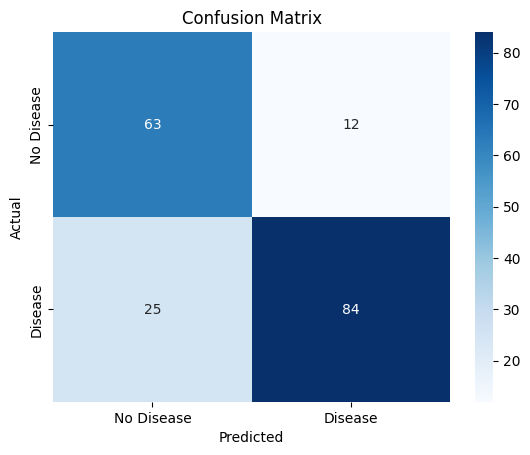

In [41]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()